In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
default_dir = "/content/drive/MyDrive/Kelompok 4 DS/Final Project"
os.chdir(default_dir)

In [ ]:
!ls

'(awal)gtau apaan ini coba2 aja dulu.ipynb'   model_qda.pkl
'(awal)model_qda.pkl'			      water_potability.csv
'Final Project.ipynb'			      water_potability_final.csv
 Final_Project_Mawar_Melati.pdf		      water_potability_final.gsheet
'Kelompok 4 DS'


In [ ]:
pip install lazypredict

#Importing

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

import lazypredict
from lazypredict.Supervised import LazyClassifier

import warnings
warnings.filterwarnings('ignore')
import pickle

#Load Dataset

We got the dataset from [Kaggle](https://www.kaggle.com/datasets/uom190346a/water-quality-and-potability)

Dataset ini berisi pengukuran kualitas air dan penilaian yang terkait dengan potabilitas, yaitu kesesuaian air untuk konsumsi manusia. Tujuan utama dari dataset ini adalah untuk memberikan wawasan tentang parameter kualitas air dan membantu dalam menentukan apakah air tersebut layak atau tidak untuk dikonsumsi. Setiap baris dalam dataset mewakili sampel air dengan faktor khusus, dan kolom "Potabilitas" mengindikasikan apakah air tersebut cocok untuk dikonsumsi.

In [ ]:
df = pd.read_csv("water_potability.csv")

In [ ]:
print(df.shape)
df.head()

(3276, 10)


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.89,20791.32,7.30,368.52,564.31,10.38,86.99,2.96,0
1,3.72,129.42,18630.06,6.64,NaN,592.89,15.18,56.33,4.50,0
2,8.10,224.24,19909.54,9.28,NaN,418.61,16.87,66.42,3.06,0
3,8.32,214.37,22018.42,8.06,356.89,363.27,18.44,100.34,4.63,0
4,9.09,181.10,17978.99,6.55,310.14,398.41,11.56,32.00,4.08,0


In [ ]:
df[df['Potability'] == 1].head(10)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
250,9.45,145.81,13168.53,9.44,310.58,592.66,8.61,77.58,3.88,1
251,9.02,128.10,19859.68,8.02,300.15,451.14,14.77,73.78,3.99,1
252,NaN,169.97,23403.64,8.52,NaN,475.57,12.92,50.86,2.75,1
253,6.80,242.01,39143.40,9.50,187.17,376.46,11.43,73.78,3.85,1
254,7.17,203.41,20401.10,7.68,287.09,315.55,14.53,74.41,3.94,1
255,7.66,236.96,14245.79,6.29,373.17,416.62,10.46,85.85,2.44,1
256,8.32,207.25,28049.65,8.83,297.81,358.73,18.71,60.91,4.05,1
257,5.93,223.86,23249.65,4.60,NaN,277.38,11.37,66.62,5.22,1
258,9.80,98.77,27357.46,9.22,323.20,512.43,14.17,59.45,2.76,1
259,6.10,215.27,15976.93,8.86,308.48,417.84,13.15,62.51,3.54,1


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ph,2785.00,7.08,1.59,0.00,6.09,7.04,8.06,14.00
Hardness,3276.00,196.37,32.88,47.43,176.85,196.97,216.67,323.12
Solids,3276.00,22014.09,8768.57,320.94,15666.69,20927.83,27332.76,61227.20
Chloramines,3276.00,7.12,1.58,0.35,6.13,7.13,8.11,13.13
Sulfate,2495.00,333.78,41.42,129.00,307.70,333.07,359.95,481.03
Conductivity,3276.00,426.21,80.82,181.48,365.73,421.88,481.79,753.34
Organic_carbon,3276.00,14.28,3.31,2.20,12.07,14.22,16.56,28.30
Trihalomethanes,3114.00,66.40,16.18,0.74,55.84,66.62,77.34,124.00
Turbidity,3276.00,3.97,0.78,1.45,3.44,3.96,4.50,6.74
Potability,3276.00,0.39,0.49,0.00,0.00,0.00,1.00,1.00


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [ ]:
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

#EDA & Visualization

##Potability Distribution

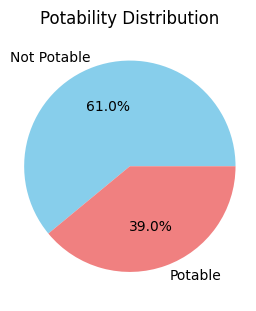

In [ ]:
# Menghitung jumlah data pada setiap kategori "Potability"
potability_counts = df['Potability'].value_counts()

# Membuat diagram lingkaran (pie chart)
plt.figure(figsize=(3, 3.5))
plt.pie(
    potability_counts,
    labels=['Not Potable', 'Potable'],
    autopct='%1.1f%%',
    colors=['skyblue', 'lightcoral']
  )
plt.title("Potability Distribution")
plt.axis('equal')  # Memastikan diagram lingkaran berbentuk lingkaran
plt.show()

##Histogram

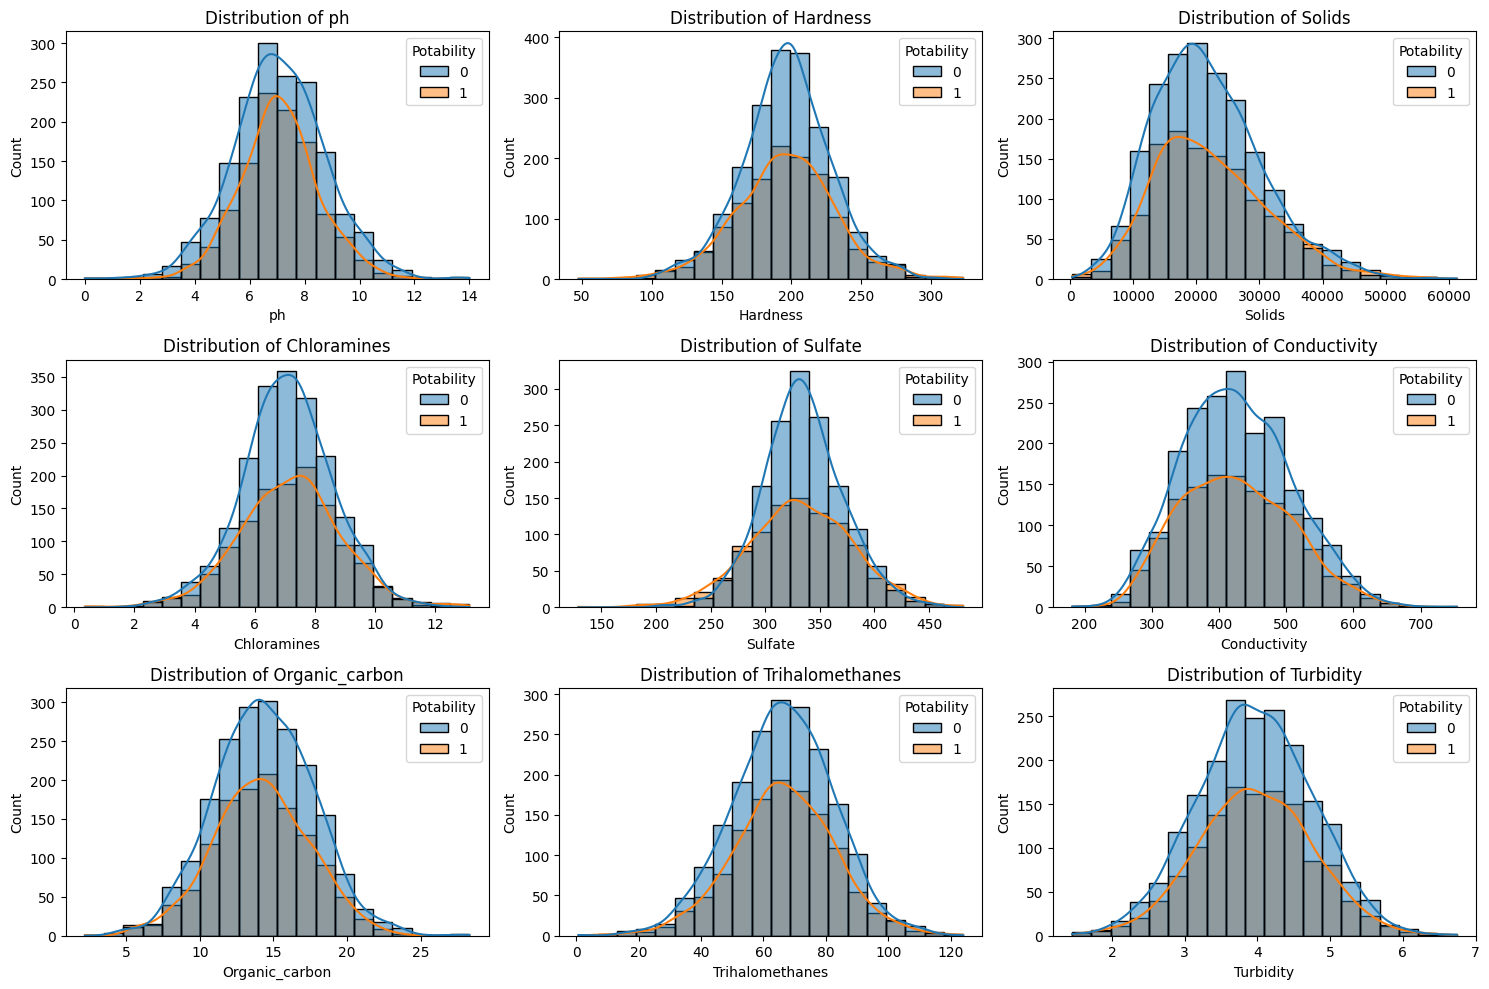

In [ ]:
# Drop the Potability column
columns = df.columns.drop('Potability')

# Create a 3x3 grid layout
fig, axes = plt.subplots(3, 3, figsize=(15, 10))

# Iterate over the columns and create a histogram for each column
for i, col in enumerate(columns):
    ax = axes[i // 3, i % 3]
    sns.histplot(
        data=df,
        x=col,
        hue='Potability',
        bins=20,
        kde=True,
        ax=ax
    )
    ax.set_title(f'Distribution of {col}')

# Adjust the layout and show the plot
fig.tight_layout()
plt.show()

##Box Plot

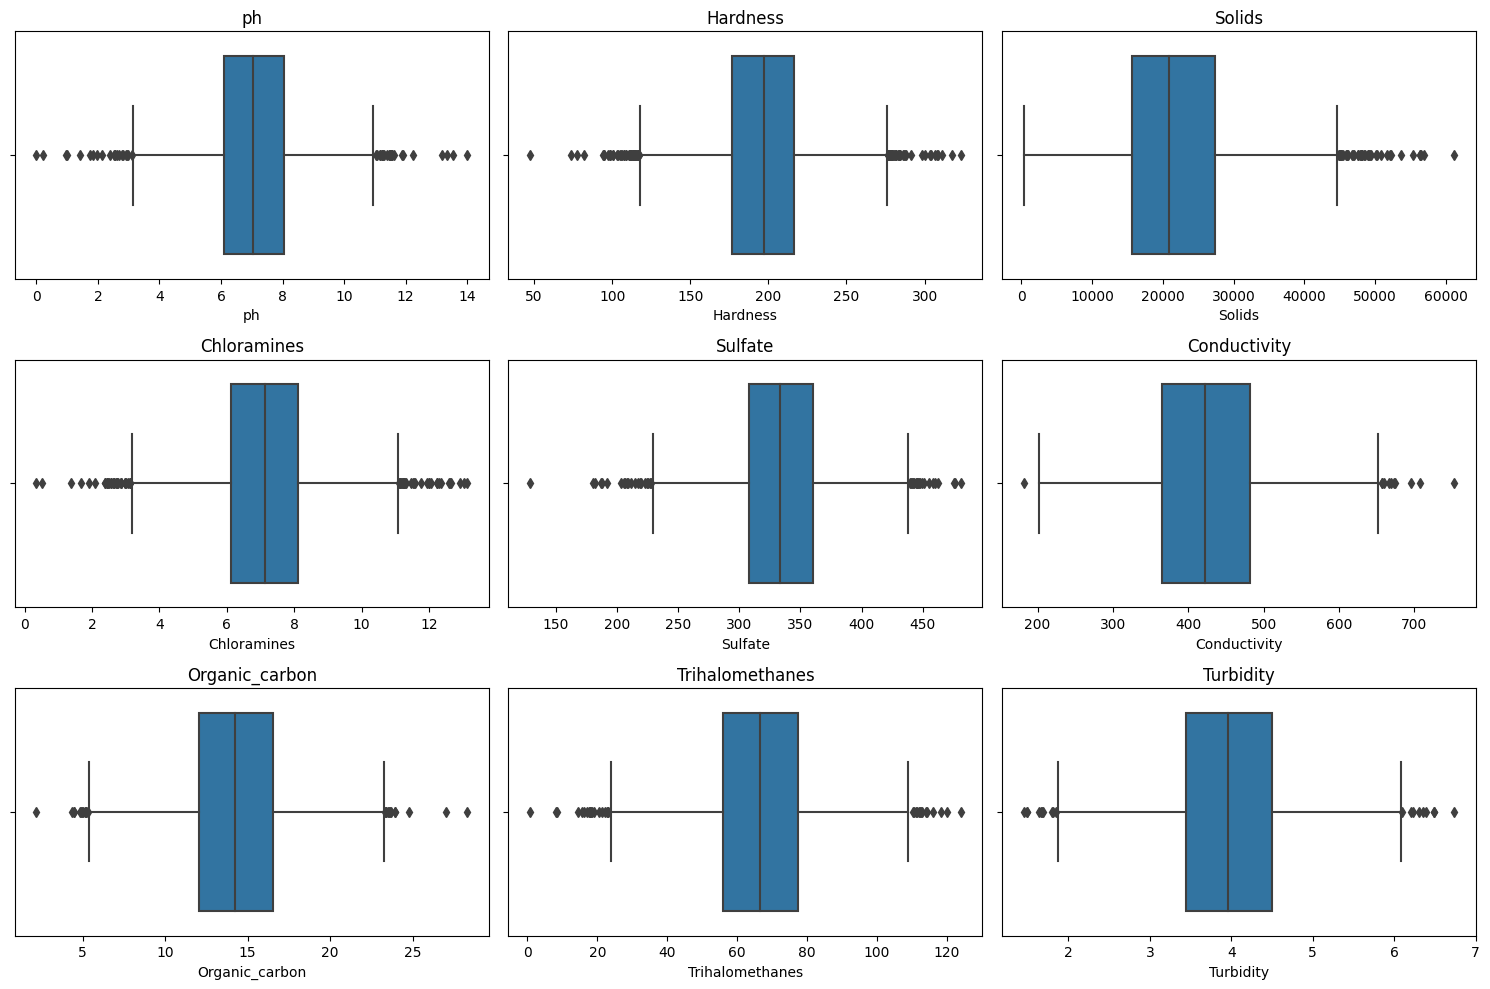

In [ ]:
plt.figure(figsize=(15, 10))

for i, col in enumerate(columns):
    plt.subplot(3, 3, i % 9 + 1)  # Adjust the 3x3 grid layout
    sns.boxplot(x=df[col])
    plt.title(col)

    if i % 3 == 2 or i == len(columns) - 1:
        plt.tight_layout()

plt.show()

##Correlation Heatmap

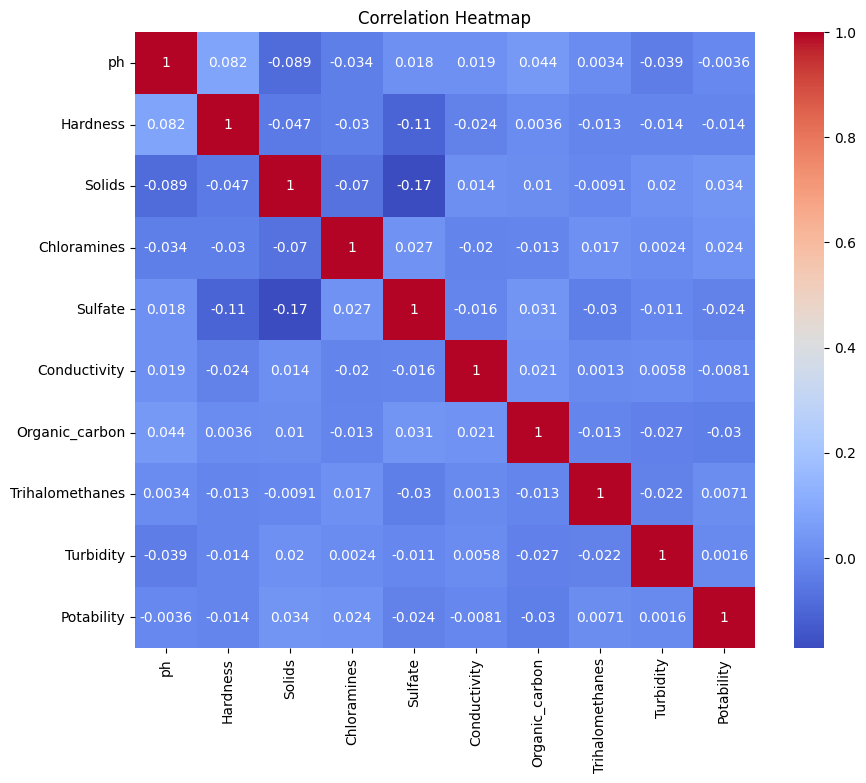

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

##Filling NaN

In [ ]:
df['ph'].fillna(df['ph'].mean(),axis=0, inplace=True)
df['Sulfate'].fillna(df['Sulfate'].mean(),axis=0, inplace=True)
df['Trihalomethanes'].fillna(df['Trihalomethanes'].mean(),axis=0, inplace=True)

In [ ]:
df.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

##Check Duplicate

In [ ]:
df.duplicated().any()

False

#Feature Engineering

##Removing Outliers


In [ ]:
# rounding the data
for cols in df.columns:
    if cols!="Potability":
        df[cols] = df[cols].round().astype('int64')

df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7,205,20791,7,369,564,10,87,3,0
1,4,129,18630,7,334,593,15,56,5,0
2,8,224,19910,9,334,419,17,66,3,0
3,8,214,22018,8,357,363,18,100,5,0
4,9,181,17979,7,310,398,12,32,4,0


In [ ]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,3276.00,3276.00,3276.00,3276.00,3276.00,3276.00,3276.00,3276.00,3276.00,3276.00
mean,7.07,196.37,22014.09,7.12,333.82,426.20,14.29,66.38,3.97,0.39
std,1.49,32.88,8768.57,1.61,36.15,80.82,3.31,15.77,0.83,0.49
min,0.00,47.00,321.00,0.00,129.00,181.00,2.00,1.00,1.00,0.00
25%,6.00,177.00,15666.50,6.00,317.00,366.00,12.00,57.00,3.00,0.00
50%,7.00,197.00,20928.00,7.00,334.00,422.00,14.00,66.00,4.00,0.00
75%,8.00,217.00,27332.50,8.00,350.00,482.00,17.00,77.00,5.00,1.00
max,14.00,323.00,61227.00,13.00,481.00,753.00,28.00,124.00,7.00,1.00


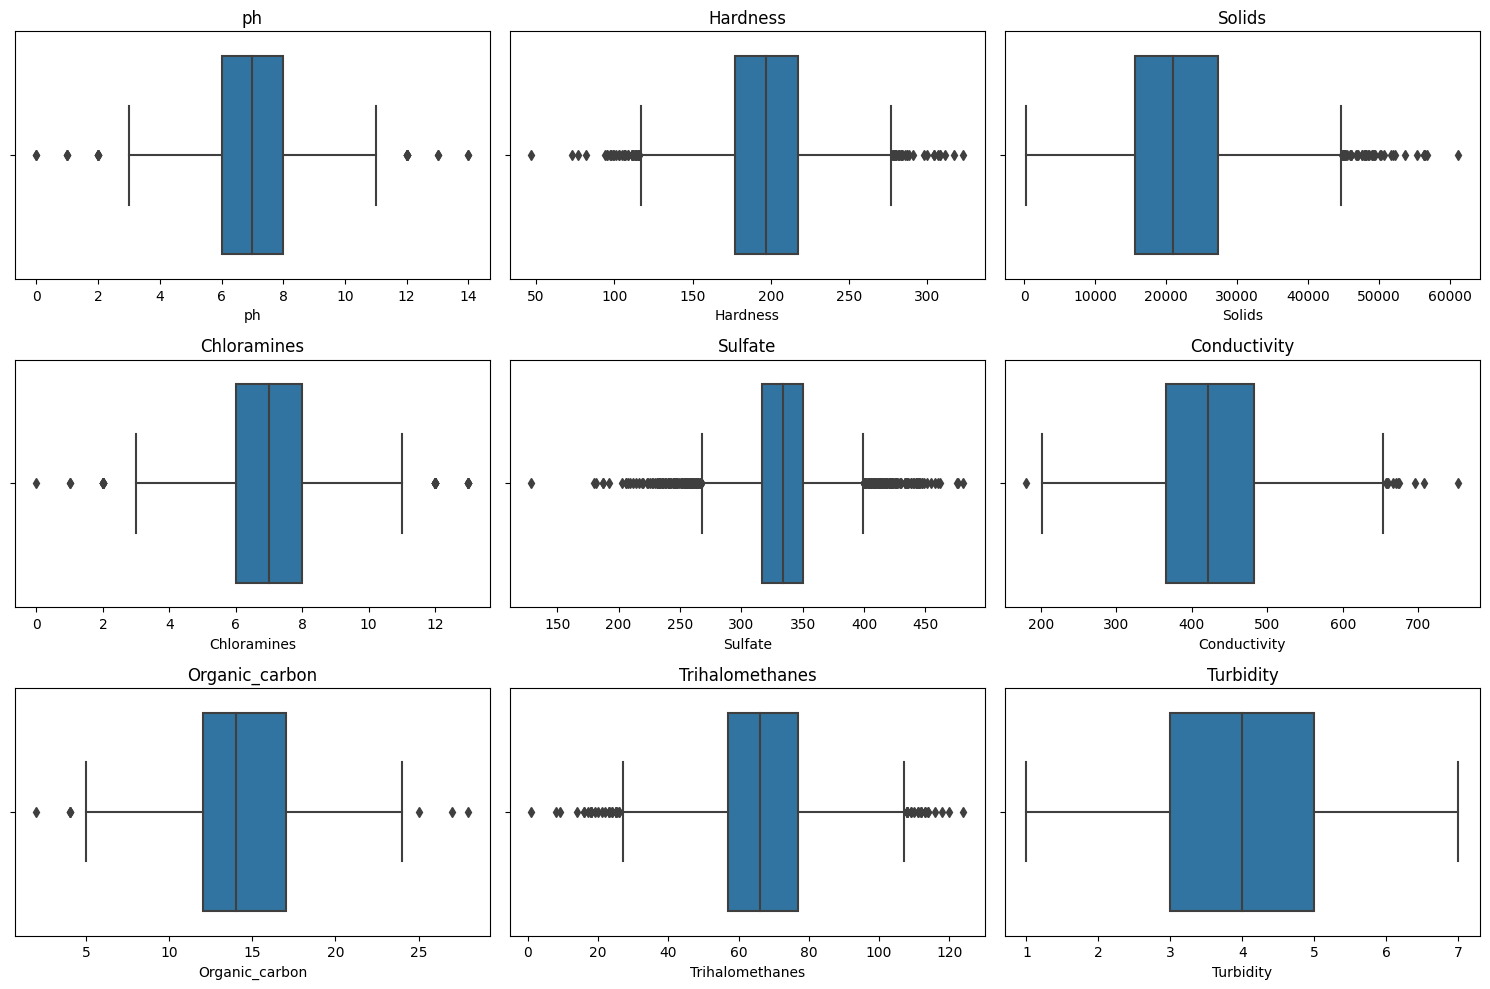

In [ ]:
plt.figure(figsize=(15, 10))

for i, col in enumerate(columns):
    plt.subplot(3, 3, i % 9 + 1)  # Adjust the 3x3 grid layout
    sns.boxplot(x=df[col])
    plt.title(col)

    if i % 3 == 2 or i == len(columns) - 1:
        plt.tight_layout()

plt.show()

In [ ]:
# finding outliers data
parameters = ['Hardness']

for i in parameters:
  Q1 = df[i].quantile(0.25)
  Q3 = df[i].quantile(0.75)
  IQR = Q3-Q1

# identify outliers
  lower_bound = Q1 - 1.5*IQR
  upper_bound = Q3 + 1.5*IQR

  outliers = df[(df[i]<lower_bound) | (df[i]>upper_bound)]
  values_out_of_range = df[(df[i]<Q1) | (df[i]>Q3)]
  outliers_df = pd.DataFrame(outliers)

df = df.drop(outliers_df.index)
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,3200.00,3200.00,3200.00,3200.00,3200.00,3200.00,3200.00,3200.00,3200.00,3200.00
mean,7.06,196.53,21949.21,7.12,333.66,426.09,14.31,66.33,3.97,0.39
std,1.47,29.99,8714.65,1.61,35.77,80.85,3.31,15.79,0.83,0.49
min,0.00,117.00,321.00,0.00,129.00,181.00,2.00,1.00,1.00,0.00
25%,6.00,177.75,15651.00,6.00,317.00,365.75,12.00,57.00,3.00,0.00
50%,7.00,197.00,20882.50,7.00,334.00,422.00,14.00,66.00,4.00,0.00
75%,8.00,216.00,27250.75,8.00,350.00,481.00,17.00,77.00,5.00,1.00
max,14.00,277.00,61227.00,13.00,481.00,753.00,28.00,124.00,7.00,1.00


##Scaling Data

In [ ]:
scaler = StandardScaler()

X = df.drop(columns="Potability")
y = df["Potability"]

scaled_data = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    scaled_data,
    y,
    test_size=0.20,
    random_state=42
)

print("X Train : ", X_train.shape)
print("X Test  : ", X_test.shape)
print("Y Train : ", y_train.shape)
print("Y Test  : ", y_test.shape)

X Train :  (2560, 9)
X Test  :  (640, 9)
Y Train :  (2560,)
Y Test  :  (640,)


#Modelling

##Lazy Classifier

In [ ]:
lcf = LazyClassifier(
    verbose=0,
    ignore_warnings=True,
    custom_metric=None,
    predictions=False,
    random_state=42,
    classifiers='all'
)

models, predictions = lcf.fit(
    X_train,
    X_test,
    y_train,
    y_test
)

100%|██████████| 29/29 [00:12<00:00,  1.41it/s]

[LightGBM] [Info] Number of positive: 1013, number of negative: 1547
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000189 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 984
[LightGBM] [Info] Number of data points in the train set: 2560, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.395703 -> initscore=-0.423401
[LightGBM] [Info] Start training from score -0.423401


100%|██████████| 29/29 [00:12<00:00,  2.36it/s]


In [ ]:
models

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
QuadraticDiscriminantAnalysis,0.72,0.64,0.64,0.69,0.04
LGBMClassifier,0.70,0.64,0.64,0.68,0.26
XGBClassifier,0.68,0.63,0.63,0.67,2.33
SVC,0.73,0.63,0.63,0.69,1.72
ExtraTreesClassifier,0.70,0.62,0.62,0.68,0.74
RandomForestClassifier,0.70,0.62,0.62,0.68,1.27
NuSVC,0.68,0.62,0.62,0.67,1.10
KNeighborsClassifier,0.66,0.61,0.61,0.66,0.15
BaggingClassifier,0.67,0.60,0.60,0.65,0.39


##Quadratic Discriminant Analysis

In [ ]:
def basic_model(model, x_train, y_train):

  clf = model
  return clf.fit(x_train, y_train)

In [ ]:
def evaluation(model, x_train, x_test, y_train, y_test):

  clf = model

  y_predict_train = clf.predict(x_train)
  y_predict_test = clf.predict(x_test)

  training_acc = accuracy_score(y_train, y_predict_train)
  testing_acc = accuracy_score(y_test, y_predict_test)

  print("Training Accuracy: {:.2}".format(training_acc))
  print("Testing Accuracy: {:.2}".format(testing_acc))

  return print(classification_report(y_test, y_predict_test))

In [ ]:
model_qda = basic_model(QuadraticDiscriminantAnalysis(), X_train, y_train)

evaluation(model_qda, X_train, X_test, y_train, y_test)

Training Accuracy: 0.67
Testing Accuracy: 0.72
              precision    recall  f1-score   support

           0       0.73      0.91      0.81       420
           1       0.68      0.36      0.47       220

    accuracy                           0.72       640
   macro avg       0.70      0.64      0.64       640
weighted avg       0.71      0.72      0.69       640



#Saving DF to CSV

In [ ]:
# df.to_csv('water_potability_final.csv', index=False)

#Dump Model to Pickle

In [ ]:
# pickle.dump(model_qda, open('model_qda.pkl', 'wb'))

#Insights

##Top 5 Potable pH

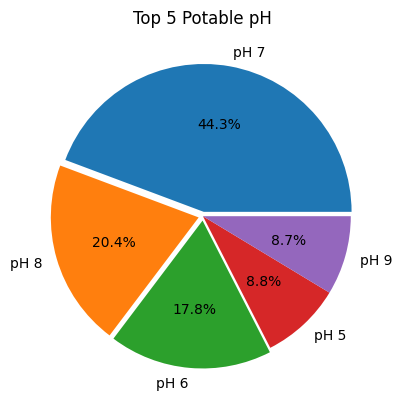

In [ ]:
ph_pot = df.loc[df['Potability'] == 1, 'ph'].reset_index(drop=True)

ph_counts = ph_pot.value_counts(normalize=True) * 100
top_5_ph = ph_counts.nlargest(5)
labels = ['pH ' + str(i) for i in top_5_ph.index]
explodes = [0.03, 0.03, 0.03, 0, 0]

# Membuat pie chart
plt.pie(
    top_5_ph,
    labels=labels,
    autopct='%1.1f%%',
    explode=explodes
  )
plt.title('Top 5 Potable pH')
plt.show()

- From the Dataset, we got to know that, best pH for Potable Water is around pH 6 - pH 8
- The Environmental Protection Agency (EPA) in the United States recommends that drinking water pH be between 6.5 and 8.5 for safe consumption. Water within this range will not be harmful and can be used to ensure healthy hydration.
- The Indonesian Ministry of Health Regulation Number 32 of 2017 sets the ideal standard for water quality test results (pH) at between 6.5 and 8.5.

##Top 5 Correlations on Potability

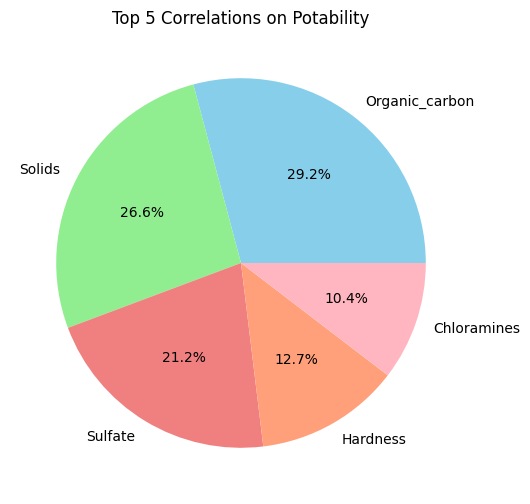

In [ ]:
correlation_with_potability = df.corr()["Potability"].abs().sort_values(ascending=False)
top_5_correlations = correlation_with_potability[1:6]  # Mengambil 5 teratas, menghindari "Potability" sendiri

plt.figure(figsize=(10, 6))
plt.pie(
    top_5_correlations,
    labels=top_5_correlations.index,
    autopct='%1.1f%%',
    colors=['skyblue', 'lightgreen', 'lightcoral', 'lightsalmon', 'lightpink']
  )
plt.title("Top 5 Correlations on Potability")
plt.show()

- The dataset shows that Organic Carbon, Solids, Sulfate, Hardness, and Chloramines are the features with the highest correlation with potability.


1. **Organic Carbon** is an organic compound that is found in water. Organic compounds can come from a variety of sources, such as industrial waste, agricultural runoff, and household wastewater. Excessive organic compounds in water can cause health problems, such as digestive disorders and cancer.
2. **Solids** are solid particles that are found in water. Solid particles can come from a variety of sources, such as soil, sediment, and minerals. Excessive solid particles in water can cause health problems, such as digestive disorders and disease.
3. **Sulfate** is a compound that contains sulfur. Sulfate can come from a variety of sources, such as groundwater, industrial waste, and agricultural runoff. Excessive sulfate in water can cause health problems, such as eye and skin irritation.
4. **Hardness** is the mineral content of calcium and magnesium in water. High hardness can cause health problems, such as digestive disorders and kidney disease.
5. **Chloramines** are compounds that form from the reaction of chlorine and ammonia. Chloramines are used to disinfect water. Excessive chloramines in water can cause health problems, such as eye and skin irritation.
